In [180]:
import piplite
await  piplite.install('openpyxl')
await  piplite.install('pyxlsb')
await  piplite.install('seaborn')


In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Reading excel files:

In [182]:
# univ1       = pd.read_excel('mms_univ_202102_calmar2wave_April_Update.xlsx', 'MMS TAM3000 Matrix', engine= 'openpyxl')
# univ2       = pd.read_excel('mms_univ_202102_calmar2wave_April_Update.xlsx', 'MMS Weights', engine= 'openpyxl')
#univ          = pd.read_excel('mms_univ_202102_calmar2wave_April_Update.xlsx', 'MMS Weights', engine= 'openpyxl')
univ          = pd.read_excel('mms_univ_202201_calmar2wave_tv_ntv.xlsx',  header=[0,1],sheet_name='MMS Weights (2)', engine= 'openpyxl')
# univ4       = pd.read_excel('mms_univ_202102_calmar2wave_April_Update.xlsx', 'MMS Guest Wgts +FamSit & Urban', engine= 'openpyxl')

RVT_str = pd.read_excel('rptrvt structure.xlsx', 'Rvt structure'  ,engine= 'openpyxl')
RPT_str = pd.read_excel('rptrvt structure.xlsx', 'rpt structure'  ,engine= 'openpyxl')

rpc        = pd.read_excel('rpc.xlsb', engine= 'pyxlsb')
rpc_test   = pd.read_excel('rpc_test.xlsb', engine= 'pyxlsb')

Renaming the rpc columns using the rptrvt strucutre description file

In [183]:
d1 = dict(zip(rpc.columns, RPT_str['Variable']))
rpc_nc      = rpc.rename(columns=d1) 

d2 = dict(zip(rpc.columns, RPT_str['Variable']))  # in the rpc_test original file the first three columns are swapped wrt rpc
d2['Column1'] = 'Household number'
d2['Column2'] = 'Individual number'
d2['Column3'] = 'Date of viewing'
rpc_test_nc = rpc_test.rename(columns=d2) 



In [184]:
d2

{'Column1': 'Household number',
 'Column2': 'Individual number',
 'Column3': 'Date of viewing',
 'Column4': 'Panel part',
 'Column5': 'Age',
 'Column6': 'Sex',
 'Column7': 'Guest',
 'Column8': 'Individual Weight',
 'Column9': 'Age/Sex-module',
 'Column10': 'Family Situation/Life Cycle',
 'Column11': 'Shopping responsible',
 'Column12': 'Streaming meter installed',
 'Column13': 'Urbanization',
 'Column14': 'SVT Region',
 'Column15': 'ICA Region',
 'Column16': 'TV4 Region',
 'Column17': 'H-region',
 'Column18': 'Household Size',
 'Column19': 'Reception',
 'Column20': 'Viewing Level',
 'Column21': 'Number of TV sets',
 'Column22': 'Teletext Access',
 'Column23': 'Video',
 'Column24': 'Education',
 'Column25': 'Working hours',
 'Column26': 'Cancelled (Life style Minerva)',
 'Column27': 'Position in Family',
 'Column28': 'Mariage situation',
 'Column29': 'Job Description',
 'Column30': 'Form of dwelling',
 'Column31': 'Household size (2)',
 'Column32': 'Household total income per month',
 '

In [281]:
rpc_nc.head()

,Date of viewing,Household number,Individual number,Panel part,Age,Sex,Guest,Individual Weight,Age/Sex-module,Family Situation/Life Cycle,...,Origin of parent. Born in Sweden?,Household Weight,LK-code,VCR at home,Ways of receiving TV: Other,Ways of receiving TV: IPTV,Ways of receiving TV: Antenna,Ways of receiving TV: Cable,Ways of receiving TV: Satellite,TV and SM
0,20220904,20,1,2,36,2,0,7569,Females 35-39,1,...,2,9995,860,2,2,1,2,2,2,4
1,20220904,45,1,2,85,1,0,26387,Males 70+,2,...,2,36024,1494,2,2,1,1,1,2,1
2,20220904,189,1,2,45,1,0,9532,Males 45-49,2,...,2,15540,1907,2,2,2,2,2,2,0
3,20220904,973,1,2,45,1,0,22034,Males 45-49,4,...,1,16613,1380,2,2,2,2,2,2,2
4,20220904,973,2,2,44,2,0,11623,Females 40-44,4,...,2,16613,1380,2,2,2,2,2,2,2


In [284]:
a=rpc_test_nc[["Age", "Sex", "Age/Sex-module","Individual Weight","TV and SM"]]
a.loc[((rpc_test_nc['TV and SM']== 0) | (rpc_test_nc['TV and SM']== 5))]

,Age,Sex,Age/Sex-module,Individual Weight,TV and SM
2,45,1,10,9396.431763,0
67,37,2,22,11674.897398,5
68,38,1,8,15704.966907,5
69,11,2,16,12966.183709,5
70,9,2,16,12966.183709,5
...,...,...,...,...,...
5484,58,1,12,16030.190448,0
5485,64,2,27,14603.574934,0
5486,68,1,13,10491.369012,0
5487,65,2,27,11832.846780,0


In [187]:
rpc_nc.sort_values(by=['Age']).Age.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
      dtype=int64)

In [188]:
univ.rename(columns={'Unnamed: 0_level_0':'module'}, inplace=True )


In [189]:
sm = pd.DataFrame(univ.iloc[12:13].sum(axis=0)).T
sm.iloc[0,0] = 'Males 60-69'

sf = pd.DataFrame(univ.iloc[27:28].sum(axis=0)).T
sf.iloc[0,0] = 'Females 60-69'

univ.iloc[13,:] = sm.iloc[0,:]
univ.iloc[28,:] = sf.iloc[0,:]

univ.drop([12,27],inplace=True)
univ.reset_index(drop=True)

module    TV only                         noTV only            \
     Age * Gender 2201 (raw) 2201 2102 Ratio Change 2201 (raw) 2201 2102   
0       Males 3-6   248288.8  248  261    -0.049808    7314.31    7   11   
1      Males 7-11   297823.9  298  293     0.017065    9031.67    9   11   
2     Males 12-14   198384.4  198  174     0.137931    4060.00    4    6   
3     Males 15-19   298791.5  299  276     0.083333    5901.95    6    8   
4     Males 20-24   305962.8  306  301     0.016611   28090.92   28   35   
5     Males 25-29   325066.7  325  332    -0.021084   53026.71   53   54   
6     Males 30-34   349072.6  349  343     0.017493   50801.66   51   42   
7     Males 35-39   318965.5  319  295     0.081356   31839.35   32   31   
8     Males 40-44   296685.4  297  291     0.020619   21933.01   22   19   
9     Males 45-49   309395.6  310  317    -0.022082   12040.73   12   18   
10    Males 50-54   310449.4  311  329    -0.054711   13939.80   14   11   
11    Males 55-59   304074.8  304  300     0.013333   13344.74   13   10   
12    Males 60-69   231575.4  232  240    -0.033333    7916.30    8    9   
13      Males 70+   741369.7  741  743    -0.002692    6200.46    6    5   
14    Females 3-6   218721.7  219  203     0.078818   15782.16   16   19   
15   Females 7-11   312844.1  313  306     0.022876    8379.30    8   17   
16  Females 12-14   182641.0  183  186    -0.016129    4130.66    4    4   
17  Females 15-19   263498.3  263  283    -0.070671    7155.07    7    7   
18  Females 20-24   223226.0  223  223     0.000000   20935.20   21   20   
19  Females 25-29   281346.3  281  296    -0.050676   33521.04   34   36   
20  Females 30-34   325839.3  326  323     0.009288   36094.85   36   32   
21  Females 35-39   304207.2  304  308    -0.012987   20965.84   21   25   
22  Females 40-44   292489.4  293  309    -0.051780   27776.11   28   15   
23  Females 45-49   327164.0  327  316     0.034810   11742.57   12   16   
24  Females 50-54   325411.3  325  320     0.015625   13695.46   14   10   
25  Females 55-59   333153.4  333  319     0.043887   12064.94   12   12   
26  Females 60-69   270250.7  270  265     0.018868    7702.93    8   10   
27    Females 70+   825074.2  825  796     0.036432    5256.11    5    7   

                Total                                      
   Ratio Change  2102    Check 2101  Check.1 Ratio Change  
0     -0.363636   255  10105.0  272  10030.0    -0.062500  
1     -0.181818   307      NaN  304      NaN     0.009868  
2     -0.333333   202      NaN  180      NaN     0.122222  
3     -0.250000   305      NaN  284      NaN     0.073944  
4     -0.200000   334      NaN  336      NaN    -0.005952  
5     -0.018519   378      NaN  386      NaN    -0.020725  
6      0.214286   400      NaN  385      NaN     0.038961  
7      0.032258   351      NaN  326      NaN     0.076687  
8      0.157895   319      NaN  310      NaN     0.029032  
9     -0.333333   322      NaN  335      NaN    -0.038806  
10     0.272727   325      NaN  340      NaN    -0.044118  
11     0.300000   317      NaN  310      NaN     0.022581  
12    -0.111111   240      0.0  249      0.0    -0.036145  
13     0.200000   747      NaN  748      NaN    -0.001337  
14    -0.157895   235      NaN  222      NaN     0.058559  
15    -0.529412   321      NaN  323      NaN    -0.006192  
16     0.000000   187      NaN  190      NaN    -0.015789  
17     0.000000   270      NaN  290      NaN    -0.068966  
18     0.050000   244      NaN  243      NaN     0.004115  
19    -0.055556   315      NaN  332      NaN    -0.051205  
20     0.125000   362      NaN  355      NaN     0.019718  
21    -0.160000   325      NaN  333      NaN    -0.024024  
22     0.866667   321      NaN  324      NaN    -0.009259  
23    -0.250000   339      NaN  332      NaN     0.021084  
24     0.400000   339      NaN  330      NaN     0.027273  
25     0.000000   345      NaN  331      NaN     0.042296  
26    -0.200000   278      0.0  275      0.0     0

In [190]:
d = dict(zip(rpc_nc.sort_values(by=['Age/Sex-module'])['Age/Sex-module'].unique(), univ['module']['Age * Gender']))
rpc_nc.replace({'Age/Sex-module':d}, inplace=True) 

In [207]:
d

{1: 'Males 3-6',
 2: 'Males 7-11',
 3: 'Males 12-14',
 4: 'Males 15-19',
 5: 'Males 20-24',
 6: 'Males 25-29',
 7: 'Males 30-34',
 8: 'Males 35-39',
 9: 'Males 40-44',
 10: 'Males 45-49',
 11: 'Males 50-54',
 12: 'Males 55-59',
 13: 'Males 60-69',
 14: 'Males 70+',
 15: 'Females 3-6',
 16: 'Females 7-11',
 17: 'Females 12-14',
 18: 'Females 15-19',
 19: 'Females 20-24',
 20: 'Females 25-29',
 21: 'Females 30-34',
 22: 'Females 35-39',
 23: 'Females 40-44',
 24: 'Females 45-49',
 25: 'Females 50-54',
 26: 'Females 55-59',
 27: 'Females 60-69',
 28: 'Females 70+'}

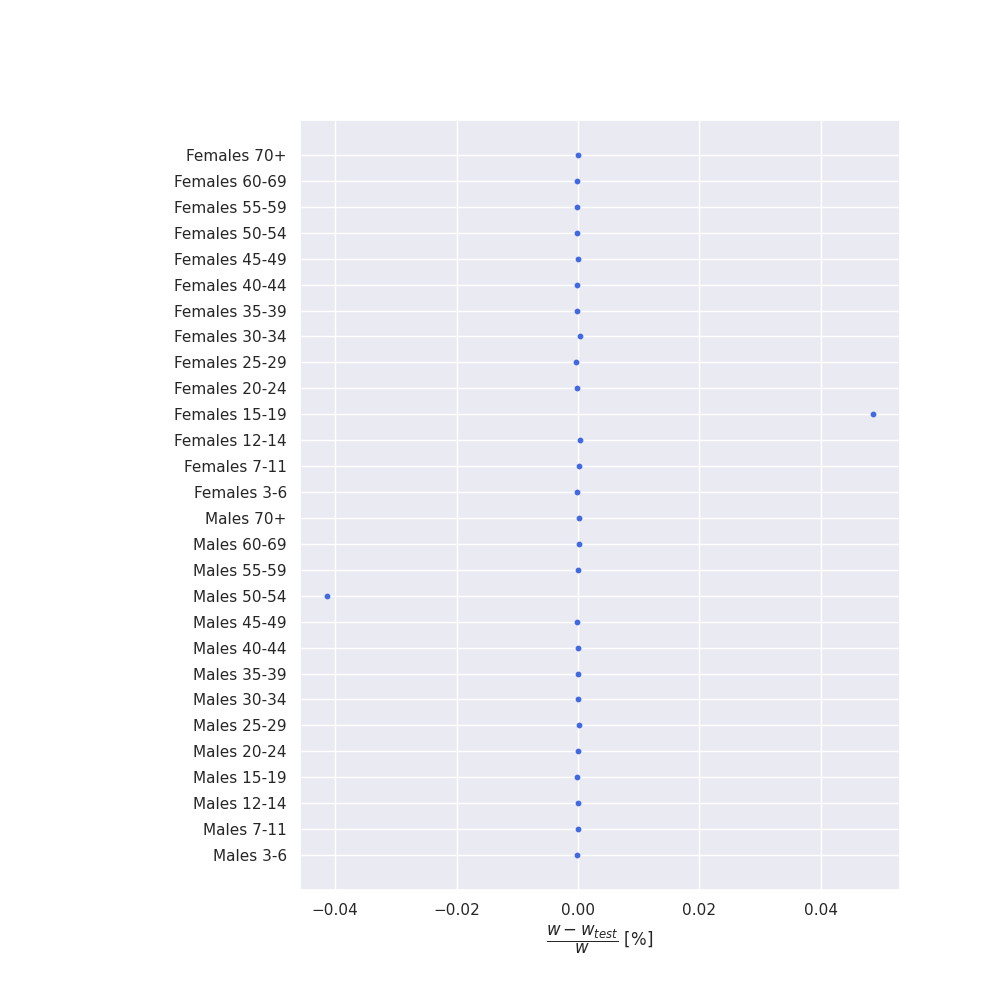

In [290]:
modules = np.array(univ['module']['Age * Gender'])

#TV Only

sns.set_theme()

fig, ax= plt.subplots(figsize=(10,10))
fig.subplots_adjust(left=0.3)

for m in modules:
    w = rpc_nc.loc[(rpc_nc['Age/Sex-module']== m) & (rpc_nc['TV and SM']!= 0) & (rpc_nc['TV and SM']!= 5)]['Individual Weight'].sum()
    wt = rpc_test_nc.loc[(rpc_nc['Age/Sex-module']== m) & (rpc_nc['TV and SM']!= 0) & (rpc_nc['TV and SM']!= 5)]['Individual Weight'].sum()
    s = univ.loc[univ['module']['Age * Gender']== m]['TV only']['2201 (raw)'].to_numpy()
    ax.scatter((w-wt)/w*100,m, c='royalblue',s=10) #check that they are the same for TV
ax.set_xlabel(r'$\dfrac{w - w_{test}}{w}$ [%]')        
plt.show()

# plt.hist((np.array(w)-np.array(s)))
# #plt.xticks(ticks=np.arange(len(modules)), labels=modules)
# plt.show()






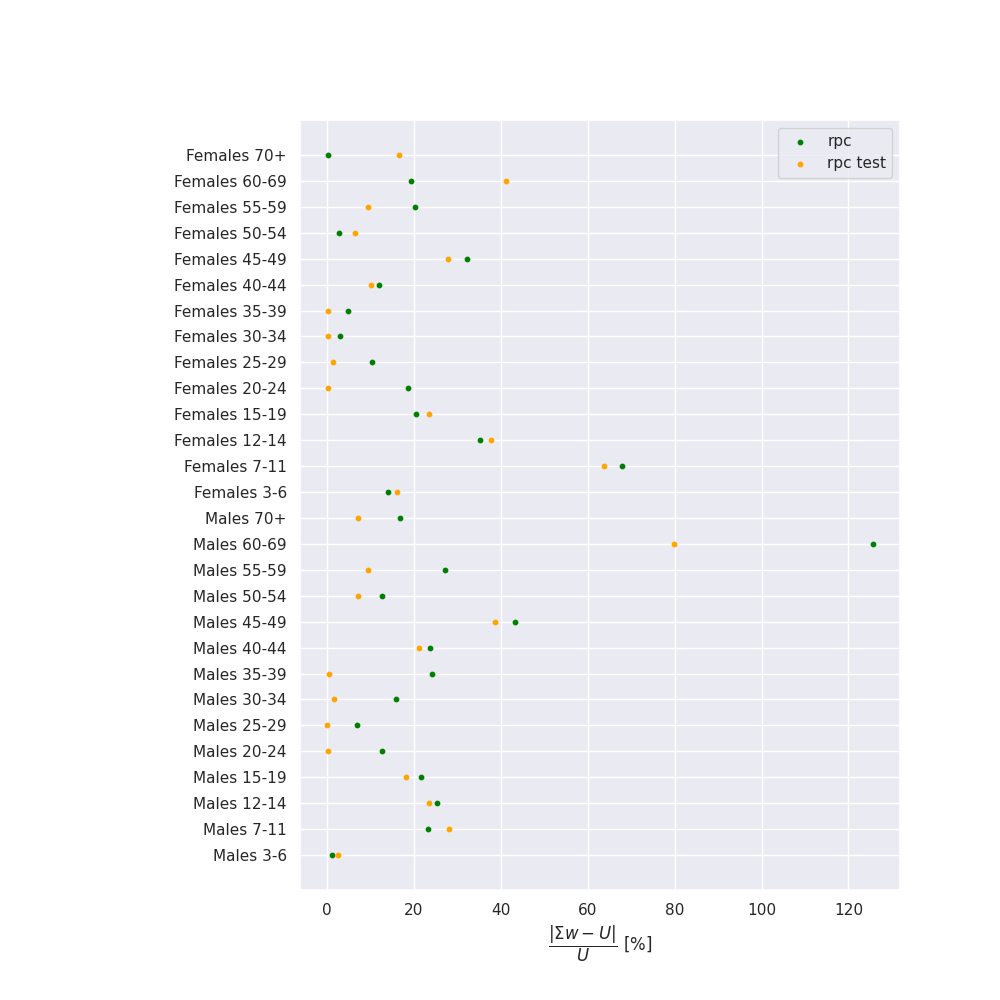

In [264]:
#No Tv

w  = []
wt = []
s  = []
sns.set_theme()

fig, ax= plt.subplots(figsize=(10,10))
fig.subplots_adjust(left=0.3)


for i, m in enumerate(modules):
    w  = rpc_nc.loc[(rpc_nc['Age/Sex-module']== m) & ((rpc_nc['TV and SM'] == 0) | (rpc_nc['TV and SM']== 5))]['Individual Weight'].sum()
    wt = rpc_test_nc.loc[(rpc_nc['Age/Sex-module']== m) & ((rpc_nc['TV and SM']== 0) | (rpc_nc['TV and SM']== 5))]['Individual Weight'].sum()
    s  = univ.loc[univ['module']['Age * Gender']== m]['noTV only']['2201 (raw)'].to_numpy()
    if (i==0):
        ax.scatter(np.abs((w/10-s)/s*100),m, c='green',s=10, label='rpc')
        ax.scatter(np.abs((wt/10-s)/s*100),m, c='orange', s=10, label='rpc test')
    else:
        ax.scatter(np.abs((w/10-s)/s*100),m, c='green',s=10)
        ax.scatter(np.abs((wt/10-s)/s*100),m, c='orange', s=10)
ax.set_xlabel(r'$\dfrac{|\Sigma w - U|}{U}$ [%]')        
plt.legend()
plt.show()

Let's check that the sets of panelists are the same (same length of the databases)

In [193]:
print(len(rpc.index), len(rpc_nc.index))


5560 5560
